# CLIENT: OLIST

"[Olist is] the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com"

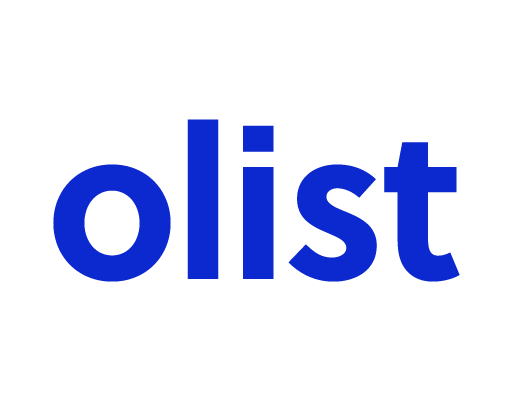

In [1]:
from IPython.display import Image
Image(filename='olist_logo.PNG') 

# PROJECT SCOPE

Goals - model for LTV value for first 6 months of customer Active vs Inactive Define
Why LTVhat is it why? What can I do with it?

The goals of customer LTV include:
* Distinguish active customers from inactive customers.
* Generate transaction forecasts for individual customers.
* Predict the purchase volume of the entire customer base.

# DATA BACKGROUND + SETUP

### DATA SOURCE
Source: Kaggle

Data Provided
What data do we have?
Dates, number of orders, nimber fof customers, orders, sellers
9 related tables.
Schema
Companies and partners were replaced with Game lf Thrones great houses


### ASSUMPTIONS

Today is last day, no major changes since
6 months is suitable to address LTV ( limitation of data)

### NOTES
* only the first 6 months of a customer data will be used for analysis unless otherwise noted
* Revenue = Payment value. Which includes freight and liabilities (freight, tax, commision to seller, credit card processing fee, etc)
* orders with status 'canceled were removed from database


### TOOLS

SQL: Creating dataframes to upload + Data Qualification
Python - Pandas
Python - Matplotlib
ETC!!


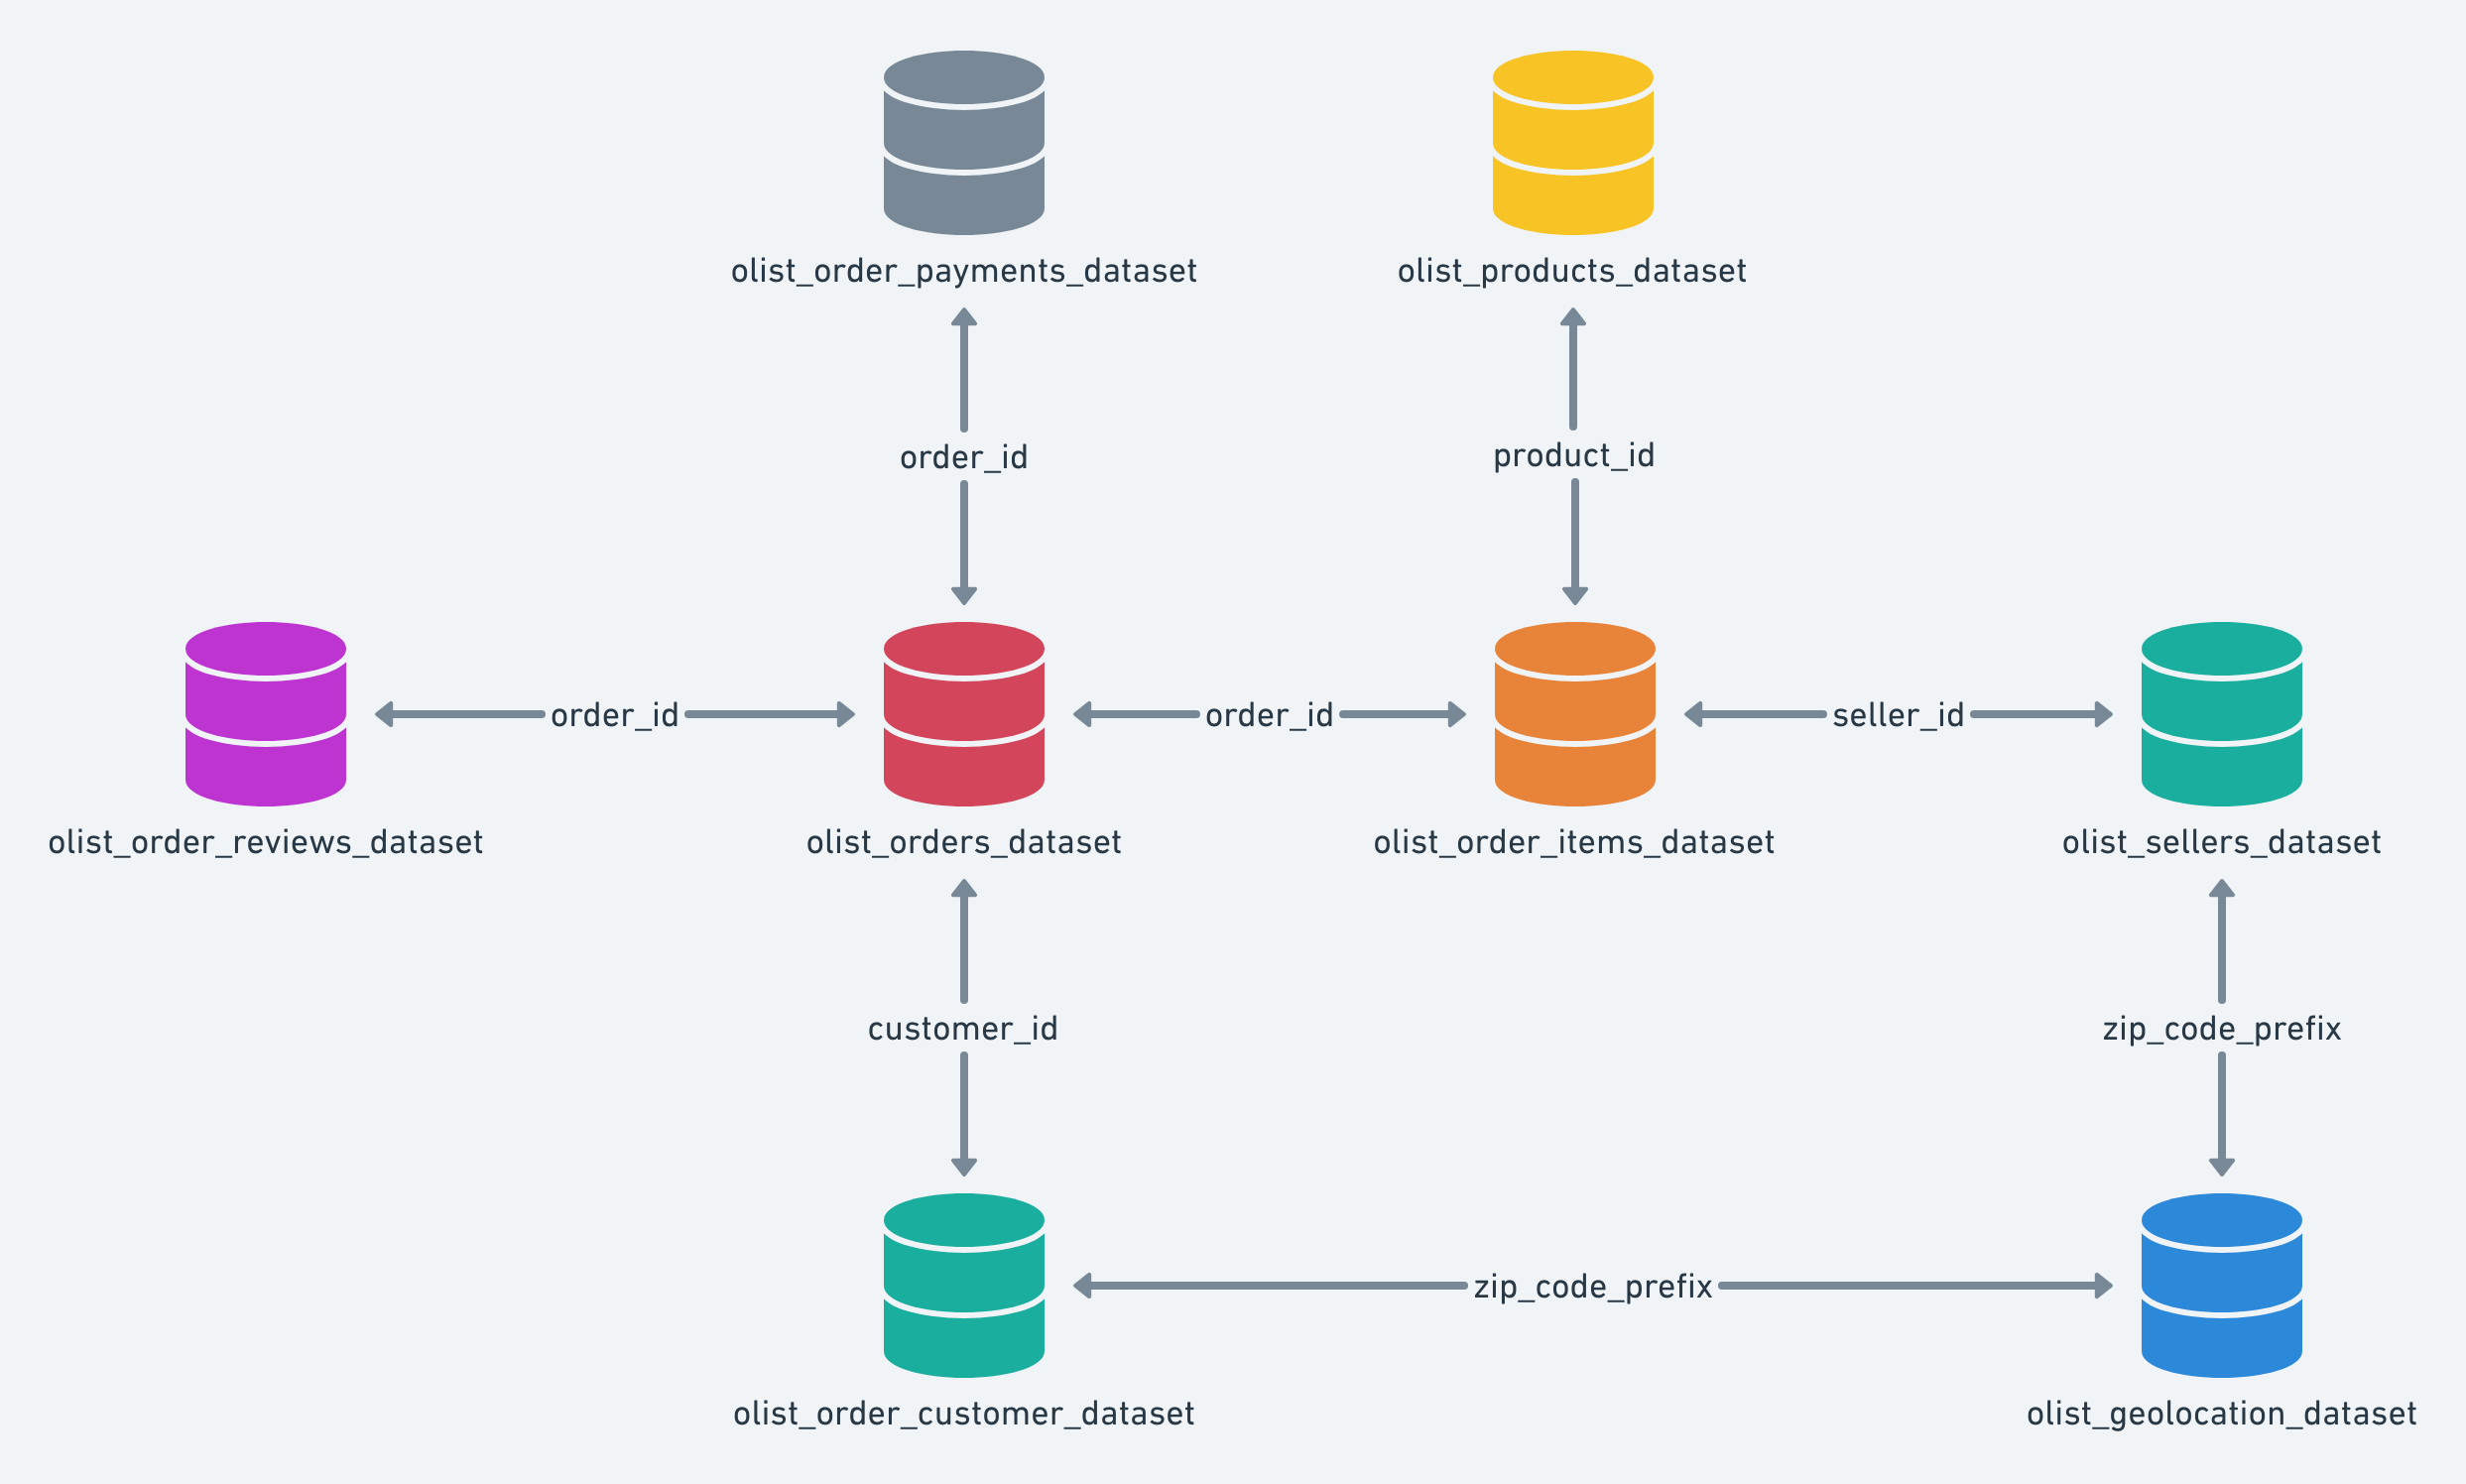

In [2]:
from IPython.display import Image
Image(filename='Schema.PNG') 

### NEXT STEPS

* Seven stages, established baseline data set and first itiration of model following by 6 stages representing the customer journey.
* On each stage, exploratory analysis, translate potential correlations into customer properties to be added to model dataframe, run, and optimize model
* End - model that has been optimized based on many different variables
* Identify parties involved


In [3]:
# import os #Do I need this?
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# Isolating Dependent Variable

In [4]:
# From SQL Query

df = pd.read_csv('df1.csv',na_values=['NULL'])

In [5]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months
0,0000366f3b9a7992bf8c76cfdf3221e2,5/10/2018 10:56,2018,5,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5/7/2018 11:11,2018,5,1,27.19
2,0000f46a3911fa3c0805444483337064,3/10/2017 21:05,2017,3,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,10/12/2017 20:29,2017,10,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,11/14/2017 19:45,2017,11,1,196.89


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 6 columns):
customer_unique_id             95557 non-null object
date_first_order               95557 non-null object
year_first_order               95557 non-null int64
month_first_order              95557 non-null int64
total_orders_first_6_months    95557 non-null int64
total_paid_first_6_months      95557 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.4+ MB


In [7]:
# Note: Timestamp in first order column is object and not timestamp

df['date_first_order'] = pd.to_datetime(df.date_first_order)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 6 columns):
customer_unique_id             95557 non-null object
date_first_order               95557 non-null datetime64[ns]
year_first_order               95557 non-null int64
month_first_order              95557 non-null int64
total_orders_first_6_months    95557 non-null int64
total_paid_first_6_months      95557 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.4+ MB


In [9]:
df.shape

(95557, 6)

In [10]:
df.describe()

,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months
count,95557.000000,95557.000000,95557.000000,95557.000000
mean,2017.538862,6.032023,1.027722,165.114350
std,0.504728,3.233668,0.183784,227.022859
min,2016.000000,1.000000,1.000000,9.590000
25%,2017.000000,3.000000,1.000000,62.980000
50%,2018.000000,6.000000,1.000000,107.650000
75%,2018.000000,8.000000,1.000000,181.780000
max,2018.000000,12.000000,9.000000,13664.080000


In [11]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,2018,5,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,2018,5,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,2017,3,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00,2017,10,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00,2017,11,1,196.89


In [12]:
# create active boolean column for possible later segmentation

df['Active?'] = np.where(df['total_orders_first_6_months']>1, 1, 0)

In [13]:
# confirm new column was made

df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,Active?
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,2018,5,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,2018,5,1,27.19,0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,2017,3,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00,2017,10,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00,2017,11,1,196.89,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 7 columns):
customer_unique_id             95557 non-null object
date_first_order               95557 non-null datetime64[ns]
year_first_order               95557 non-null int64
month_first_order              95557 non-null int64
total_orders_first_6_months    95557 non-null int64
total_paid_first_6_months      95557 non-null float64
Active?                        95557 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(1)
memory usage: 4.7+ MB


In [15]:
# customer count

len(df.customer_unique_id.unique())

95557

In [16]:
# average revenue per customer in the first 6 months

df["total_paid_first_6_months"].mean()

165.11435028307713

In [17]:
# average order_count per customer in the first 6 months

df["total_orders_first_6_months"].mean()

1.0277216739746957

In [18]:
# What is the median?
df.total_orders_first_6_months.median()

1.0

# PART 1 - We got a new customer! When did this happen?

In [19]:
# First valuable to look at is the month the customer became active

new_customers_by_month = df.groupby('month_first_order').count().customer_unique_id
new_customers_by_month

month_first_order
1      7754
2      8118
3      9549
4      9034
5     10171
6      9049
7      9901
8     10376
9      4113
10     4743
11     7270
12     5479
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

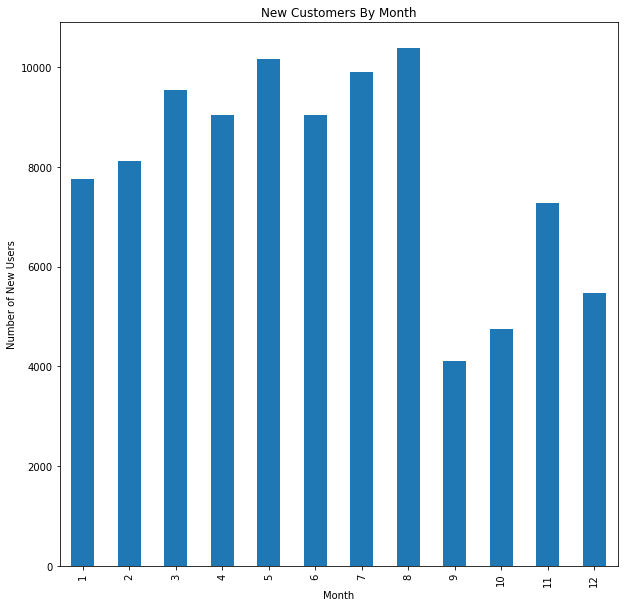

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_month.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of New Users')

In [21]:
# What date range do we have here for first order (the day the customer converted for the first tim)e?

df.date_first_order.min()

Timestamp('2016-09-04 21:15:00')

In [22]:
# Last conversion in data set

df.date_first_order.max()

Timestamp('2018-08-29 15:00:00')

In [23]:
# To have a better sense, perhaps we should add the year


new_customers_by_month_year = df.groupby(['year_first_order','month_first_order']).count().customer_unique_id
new_customers_by_month_year

year_first_order  month_first_order
2016              9                       1
                  10                    297
                  12                      1
2017              1                     762
                  2                    1735
                  3                    2603
                  4                    2334
                  5                    3571
                  6                    3126
                  7                    3868
                  8                    4162
                  9                    4112
                  10                   4446
                  11                   7270
                  12                   5478
2018              1                    6992
                  2                    6383
                  3                    6946
                  4                    6700
                  5                    6600
                  6                    5923
                  7                    6

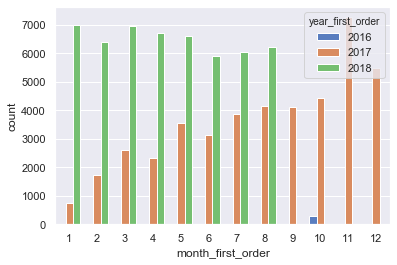

In [44]:
sns.set(style="darkgrid")
ax = sns.countplot(x="month_first_order", hue = "year_first_order", data=df, palette = "muted")

#### Oh Oh! In 2017, new users per month continued to go up but it seems to be stalling in 2018. 

In [46]:
# is average number of new customers increasing per year

new_customers_by_year = df.groupby('year_first_order').count().customer_unique_id
new_customers_by_year

year_first_order
2016      299
2017    43467
2018    51791
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

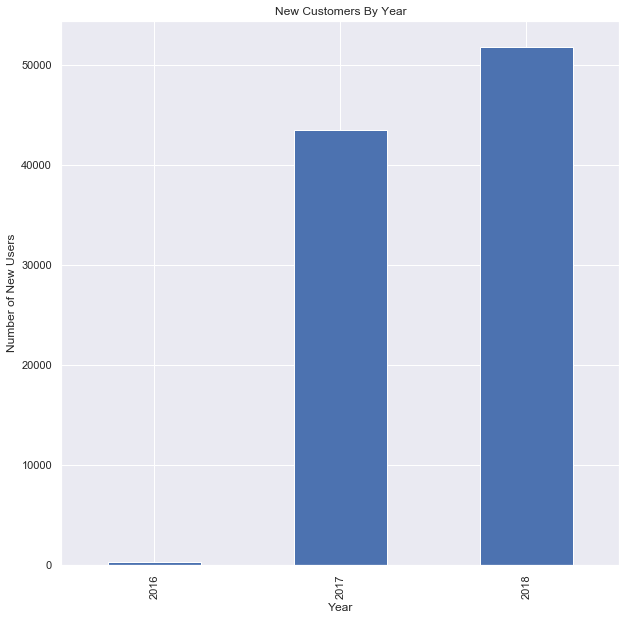

In [45]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_year.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of New Users')

### Good news! Even though we don't have all the data for the last 4 months of 2018. The total number of new users for January - August 29 is already higher than all of 207

In [47]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,Active?
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,2018,5,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,2018,5,1,27.19,0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,2017,3,1,86.22,0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00,2017,10,1,43.62,0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00,2017,11,1,196.89,0


In [53]:
# average 6-month revenue split by year 

df["total_paid_first_6_months"].mean()

df.groupby('year_first_order').mean().total_paid_first_6_months

year_first_order
2016    180.906254
2017    165.938862
2018    164.331186
Name: total_paid_first_6_months, dtype: float64

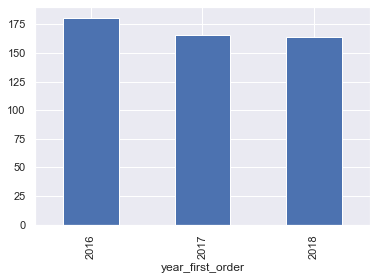

In [63]:
df.groupby('year_first_order').mean().total_paid_first_6_months.plot.bar()

### Oh Oh! Average first 6 months decreasing YOY

In [72]:
# average 6-month revenue split by month

df["total_paid_first_6_months"].mean()

df.groupby('month_first_order').mean().total_paid_first_6_months

month_first_order
1     160.121118
2     157.383221
3     167.333929
4     172.468507
5     169.986005
6     166.479152
7     163.113787
8     158.598298
9     176.765349
10    173.505880
11    163.445842
12    158.502473
Name: total_paid_first_6_months, dtype: float64

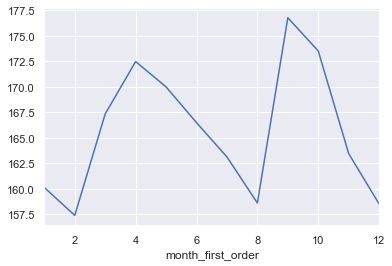

In [71]:
df.groupby('month_first_order').mean().total_paid_first_6_months.plot()

### Average 6-month revenue per customer changes widely based on month he/she became active

### NEW VARIABLE FOR MODEL = MONTH_FIRST_ORDER

In [82]:
# Now, let's look at the day of the week when the customer was acquired

df['day_first_order'] = df['date_first_order'].dt.dayofweek

In [75]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,Active?,day_first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,2018,5,1,141.90,0,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,2018,5,1,27.19,0,0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,2017,3,1,86.22,0,4
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00,2017,10,1,43.62,0,3
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00,2017,11,1,196.89,0,1


In [77]:
def dayofweek(row):
    if row['day_first_order'] == 0:
        return 'Monday'
    elif row['day_first_order'] == 1:
        return 'Tuesday'
    elif row['day_first_order'] == 2:
        return 'Wednesday'
    elif row['day_first_order'] == 3:
        return 'Thursday'
    elif row['day_first_order'] == 4:
        return 'Friday'
    elif row['day_first_order'] == 5:
        return 'Saturday'
    elif row['day_first_order'] == 6:
        return 'Sunday'

df.loc[:,'day_first_order'] = df.apply(dayofweek, axis=1)

df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,Active?,day_first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,2018,5,1,141.90,0,Thursday
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,2018,5,1,27.19,0,Monday
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,2017,3,1,86.22,0,Friday
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00,2017,10,1,43.62,0,Thursday
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:00,2017,11,1,196.89,0,Tuesday


In [79]:
new_customers_by_day_of_the_week = df.groupby('day_first_order').count().customer_unique_id
new_customers_by_day_of_the_week

day_first_order
Friday       13600
Monday       15556
Saturday     10446
Sunday       11492
Thursday     14157
Tuesday      15347
Wednesday    14959
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

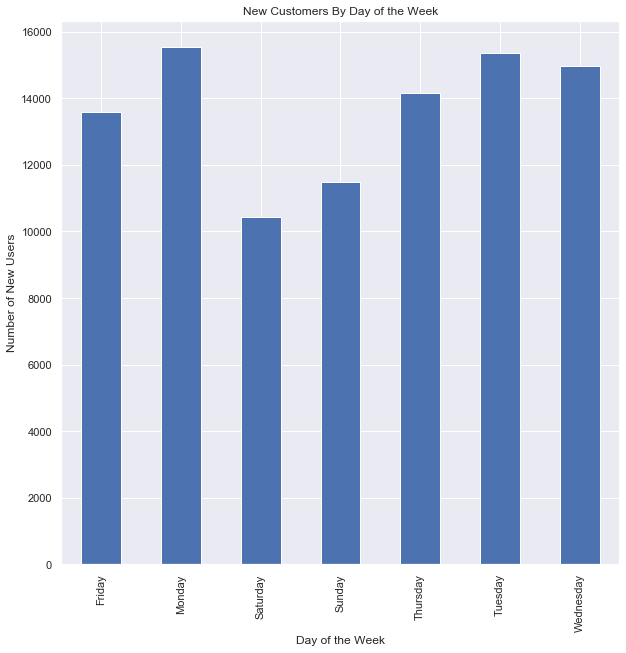

In [80]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_day_of_the_week.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of New Users')

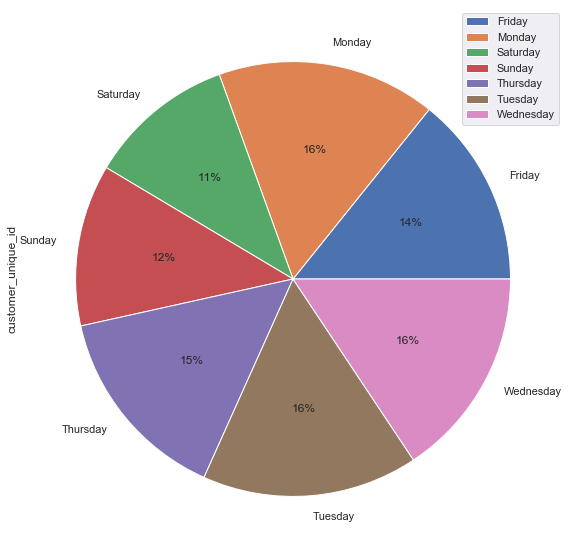

In [81]:
dfs = pd.DataFrame(new_customers_by_day_of_the_week)
plot = dfs.plot.pie(subplots = True, figsize=(10, 10), autopct='%1.0f%%')

### The difference between the first day of the order place is mild. The only observation is that the bottom 2 days of the weeks with the least amount of new uses were actually Saturday and Sunday. So, there is a higher chance of adding new customers on weekdays instead of weekdays

### VARIABLE REJECTED FOR MODEL = DAY_FIRST_ORDER

# PART 2 - We got a new customer! Where are they from?

In [102]:
# Next step, let's add customer's demographic data. 
# Although customer cities are given in data, given zip codes were mapped with geolocation reference data to generate city/state

customer_demo = pd.read_csv('customer_demographics.csv',na_values=['NULL'],encoding='latin-1')

In [98]:
customer_demo.head()

,customer_unique_id,customer_zip_code,customer_geo_city,customer_geo_state
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,caieiras,SP
1,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP
2,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP
3,0000f46a3911fa3c0805444483337064,88115,sao jose,SC
4,0000f46a3911fa3c0805444483337064,88115,são josé,SC


In [99]:
# There are dupes in table. Should be dropped

customer_demo.drop_duplicates(subset ="customer_unique_id", 
                     keep = False, inplace = True) 

In [100]:
customer_demo.head()

,customer_unique_id,customer_zip_code,customer_geo_city,customer_geo_state
2,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP
7,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP
10,00050ab1314c0e55a6ca13cf7181fecf,13084,campinas,SP
11,00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR
16,0006fdc98a402fceb4eb0ee528f6a8d4,29400,mimoso do sul,ES


In [101]:
customer_demo.shape

(50395, 4)

In [106]:
customers_by_state = customer_demo.groupby("customer_geo_state").count().customer_unique_id
customers_by_state

customer_geo_state
AC      125
AL      693
AM      148
AP      121
BA     4235
CE     1520
DF     4660
ES     2652
GO     3322
MA     1210
MG    14548
MS      894
MT     1456
PA     1621
PB      822
PE     1922
PI      557
PR     6366
RJ    16053
RN      576
RO      317
RR       45
RS     6588
SC     5722
SE      395
SP    67076
TO      360
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of Users')

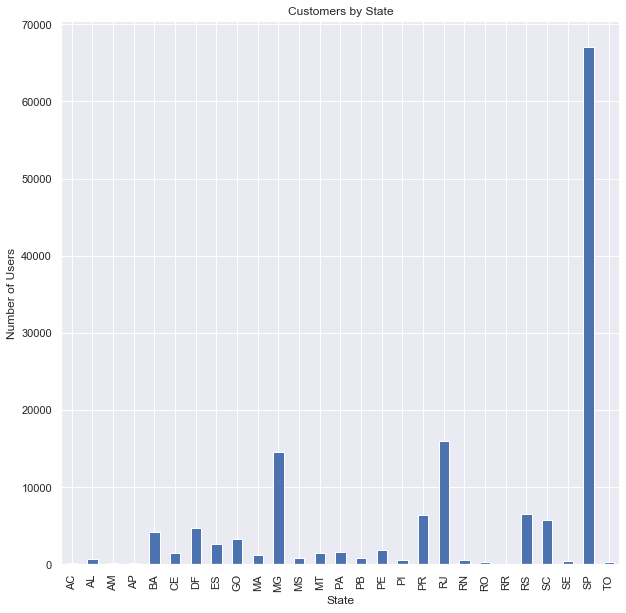

In [107]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
customers_by_state.plot(kind = 'bar', ax = ax)
ax.set_title('Customers by State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Users')

### The difference between states is quite drastic. Understandably, Sao Paulo is the biggest one but the second most popular state Rio de Janeiro has about half the population but a much smaller percentage of users. Olist should consider looking at why either the SP region is more likely to use the platform and/or why other regions wouldn't. State Data will be added to the customer dataframe for first 6 months.

In [110]:
# Let's see if the average 6-month revenue fluctuates over state